In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Version Info
# tensorflow2.2, Cudnn7.6.5 and Cuda 10.1, python 3.8 

In [2]:
# Physical devices to be used by tersorflow
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [8]:
tf.test.is_built_with_cuda()

True

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 70s 0us/step


In [4]:
# Red, Green, Blue
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

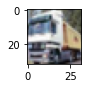

In [12]:
plot_sample(1)

In [13]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
classes[y_train[3][0]]

'deer'

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [19]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
32*32*3

3072

In [23]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
# Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8623 - accuracy: 0.3343
Epoch 2/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6562 - accuracy: 0.4142
Epoch 3/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5699 - accuracy: 0.4457
Epoch 4/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5067 - accuracy: 0.4667
Epoch 5/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4567 - accuracy: 0.4846
Epoch 6/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4116 - accuracy: 0.5020
Epoch 7/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3751 - accuracy: 0.5148
Epoch 8/50
1563/1563 [==============================] - 97s 62ms/step - loss: 1.3364 - accuracy: 0.52973s - loss: 1.3359 - ac - - ETA: 0s - loss: 1.3361 - accura
Epoch 9/50
1563/1563 [==============================] - 105s 67ms/step - loss: 1.3029 - accuracy: 0.5429
Epoch

1563/1563 [==============================] - 122s 78ms/step - loss: 1.0814 - accuracy: 0.6211 32s - loss: 1.0792 - accu - ETA:  - ETA: 2s - loss: 1.0817 - accuracy: 0.62 - ETA: 2s - loss: 1.0817 - ac
Epoch 18/50
1563/1563 [==============================] - 106s 68ms/step - loss: 1.0579 - accuracy: 0.6308 32s - loss: 1.0539 - ac - ETA: 32s - los - ETA: 30s  - ETA: 30s - loss: 1.0 - ETA: 0s - loss: 1.0580 
Epoch 19/50
1563/1563 [==============================] - 155s 99ms/step - loss: 1.0319 - accuracy: 0.6398
Epoch 20/50
1563/1563 [==============================] - 215s 138ms/step - loss: 1.0089 - accuracy: 0.6481
Epoch 21/50
 609/1563 [==========>...................] - ETA: 2:08 - loss: 0.9665 - accuracy: 0.6632WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.100022). Check your callbacks.


1563/1563 [==============================] - 196s 126ms/step - loss: 0.9791 - accuracy: 0.6588
Epoch 22/50
1563/1563 [==============================] - 217s 139ms/step - loss: 0.9578 - accuracy: 0.6661 - loss:
Epoch 23/50
1563/1563 [==============================] - 176s 113ms/step - loss: 0.9340 - accuracy: 0.676854s - loss:  - ETA: 52s - loss: 0.9294 - accuracy:  - ETA: 3s - ETA: 1s - loss: 0.933 - ETA: 0s - loss: 0.9342 - accura
Epoch 24/50
1563/1563 [==============================] - 198s 126ms/step - loss: 0.9083 - accuracy: 0.6864 - loss: 0.9082 - ac
Epoch 25/50
1333/1563 [========================>.....] - ETA: 36s - loss: 0.8776 - accuracy: 0.6956- ETA: 58s - loss: 0.8 - ET - ETA: 37s - loss: 0.8774 - accuracy: 0.6 - ETA: 37s - loss: 0.8773 - accuracy: 0. - ETA: 37s - loss: 0.8776 - accuracy: 0.695 - ETA: 37s - loss: 0.8774 - accuracy: 0.6WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.220901). Check your callbacks.


1563/1563 [==============================] - 262s 168ms/step - loss: 0.8814 - accuracy: 0.6939 - l - ETA: 2s - los
Epoch 26/50
1563/1563 [==============================] - 222s 142ms/step - loss: 0.8574 - accuracy: 0.702619s - loss: 0.8563  - ETA: 6s - ETA: 4s - l - ETA: 2s - l - ETA: 0s - loss: 0.8575 - accuracy: 0.
Epoch 27/50
1563/1563 [==============================] - 183s 117ms/step - loss: 0.8321 - accuracy: 0.712643s - loss: 0.82 - ETA: 41s - los - ETA: 19s - loss: 0.8292 - accura - ETA: 18s - loss: 0.8288 - accura - ETA: 17s - loss: 0.8286 - accuracy: 0 - ETA: 16s - loss: 0.8286 - accurac - - ETA: 7s - loss: 0.8316 - accuracy: 0.71 - ETA: 7s - loss: 0.8315 - accu - ETA: 1s -
Epoch 28/50
1020/1563 [==================>...........] - ETA: 1:26 - loss: 0.8031 - accuracy: 0.7213WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.114539). Check your callbacks.


1563/1563 [==============================] - 220s 141ms/step - loss: 0.8110 - accuracy: 0.719354s - ETA: 49s - loss: 0.8076 - accuracy: 0.71 - ETA - ETA: 35s - loss: 0.8075 - accuracy: 0.71 - ETA: 35s - loss: 0. - ETA: 31s - loss: 0.8076 - accuracy: 0. - ETA: 31s - loss: 0.80 - E
Epoch 29/50
1563/1563 [==============================] - 291s 186ms/step - loss: 0.7805 - accuracy: 0.7317
Epoch 30/50
 130/1563 [=>............................] - ETA: 5:29 - loss: 0.7263 - accuracy: 0.7481WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.127527). Check your callbacks.


1563/1563 [==============================] - 324s 208ms/step - loss: 0.7581 - accuracy: 0.74071:24 - loss: 0.7540 - accuracy: 0. - ETA: 1: - ETA: 1:20 - - ETA: 1:05 - loss: 0.7551 - accuracy: 0.74 - ETA: 1:05 - loss: 0.7549  - ETA: 57s - loss: 0 - ETA: 51s - loss: 0.7551 - -  - ETA: 30s - loss: 0.7570 - accu - ETA: 27s - loss: 0.7569 - accu - ETA: 25s - loss: 0.7567 - accura - ETA: 23s - loss: 0.7569 - accuracy: 0.7 - ETA: 1s - loss: 0.7585 - accuracy:  - ETA: 1s - loss: 0.7583 - ac
Epoch 31/50
 223/1563 [===>..........................] - ETA: 5:31 - loss: 0.7137 - accuracy: 0.7611WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.136535). Check your callbacks.


1050/1563 [===================>..........] - ETA: 2:23 - loss: 0.7270 - accuracy: 0.7533 ETA: 2:25 - loss: 0.7259 - accuracy: 0. - ETA: 2:25 - loss: 0.7259 - accu - ETA: 2:24 - loss: 0.7267 - accuracy: 0.75 - ETA: 2:24 - loss: 0.7266 - accuracy: 0.75 - ETA: 2:24 - loss: 0.7269 - accuracy: 0.75 - ETA: 2:24 - loss: 0.7272 - accuracy - ETA: 2:24 - loss: 0.7271 - accuracy: 0.75WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.296111). Check your callbacks.


1563/1563 [==============================] - 415s 266ms/step - loss: 0.7320 - accuracy: 0.7504
Epoch 32/50
 532/1563 [=========>....................] - ETA: 3:47 - loss: 0.6924 - accuracy: 0.7659 ETA: 3:45 - loss: 0.6926 - accuracyWARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.133994). Check your callbacks.


1563/1563 [==============================] - 322s 206ms/step - loss: 0.7081 - accuracy: 0.7581
Epoch 33/50
1450/1563 [==========================>...] - ETA: 19s - loss: 0.6841 - accuracy: 0.7684  ETA: 1:1 - ETA: 48s - loss: 0.6828 - accuracy:  - ETA: 47s - loss: 0.6828 - accurac - ETA: 45s - loss: 0.6826 - accuracy: 0.7 - ETA: 45s - lo - ETA: 40s - loss: 0.6840 - accuracy: 0.7 - ETA: 40s - loss: 0.6843 - accuracy:  - ETA: 31s - loss: 0.6830 - ac - ETA: 29s - loss: 0.6827 - accuracy: 0.769 - ETA: 28s - loss: 0.6827 - accuracy: 0.76 - ETA: 28s - lo - ETA: 23s - loss: 0.6834 - accuracy: 0.76 - ETA: 23s - loss: WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.120988). Check your callbacks.


1563/1563 [==============================] - 263s 168ms/step - loss: 0.6860 - accuracy: 0.7671
Epoch 34/50
1563/1563 [==============================] - 271s 173ms/step - loss: 0.6601 - accuracy: 0.775436s - los - ETA: 31s - loss: 0.6579 - accuracy: 0.776 - ETA: - ETA: 24s - loss: 0.6 -
Epoch 35/50
 659/1563 [===========>..................] - ETA: 2:25 - loss: 0.6220 - accuracy: 0.7912 ETA: 2:29 - loss: 0.6210 - accuracy:  - ETA: 2:29 - loss: 0.6218 - ac - ETA: 2:27 - loss: 0.6218 - accuracy: 0.79 - ETA: 2:27 - los - ETA: 2:23 - loss: 0.6210 - accuracy:  - ETA: 2:23 - loss: 0.6210 - accuracy: 0. - ETA: 2:23 - loss: 0.621WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.108006). Check your callbacks.


1563/1563 [==============================] - 232s 149ms/step - loss: 0.6389 - accuracy: 0.784036s - loss: 0.6329 - accuracy: - ETA: 35s - loss: - ETA: - ETA: 25s - loss: 0.6331 - a - ETA: 6s - loss: 0.6355 - accuracy - ETA: 5s - loss: 0.6355 - accu - ETA: 4s - loss: 0
Epoch 36/50
1563/1563 [==============================] - 234s 150ms/step - loss: 0.6104 - accuracy: 0.7950
Epoch 37/50
 377/1563 [======>.......................] - ETA: 5:06 - loss: 0.5701 - accuracy: 0.8113WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.180013). Check your callbacks.


1563/1563 [==============================] - 255s 163ms/step - loss: 0.5873 - accuracy: 0.80141:00 - loss: 0.5824 - a - ETA: 57s - loss: 0.5819 - accuracy: 0.803 - ETA: 5 - ETA: 50s - loss: 0.581 - ETA: 46s - loss: 0. - ETA: 42s - loss: 0.5819 - - ETA: 23s - loss: 0.5855 - - ETA: 20s - loss: 0.5865  - ETA: 17s - l - ETA: 12s - loss: 0.5863 - accuracy: 0.80 - ETA: 12s - loss: 0.5863 - accuracy: 0.8 - ETA: 11s - loss: 0.5864 - accuracy - ETA: 10s - loss: - ETA: 7s - loss: - ETA: 5s - los
Epoch 38/50
1563/1563 [==============================] - 208s 133ms/step - loss: 0.5656 - accuracy: 0.812126s - loss: - ETA: 22s - loss: 0.5610 - accura - ETA: 2 - ETA: 7s - ETA: 2s - loss: 0.5653 - accuracy: 0.81 - ETA: 
Epoch 39/50
1563/1563 [==============================] - 225s 144ms/step - loss: 0.5438 - accuracy: 0.81901: - ETA: 1:09 - los - ETA: 1:03 - loss: 0.5390 - accuracy: 0 - ETA: 50s - loss: 0.5405 - ETA: 48s - loss: 0.5403 - accuracy: 0 - ETA: 47s - loss:  - ETA: 43s - loss: 0.5399 - accur

1563/1563 [==============================] - 216s 138ms/step - loss: 0.5229 - accuracy: 0.826132s - loss: 0.5173 - accuracy: 0. - ETA: 31s - loss: 0.5174 - accuracy: 0 - ETA: 30s - l - ETA: 5s - loss: 0.5225 - accuracy: 0. - ETA: 4s - loss: 0.5224 - accuracy: 0. - ETA: 4s - ETA: 2s
Epoch 41/50
 798/1563 [==============>...............] - ETA: 2:36 - loss: 0.4891 - accuracy: 0.8398WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.191503). Check your callbacks.


1563/1563 [==============================] - 276s 177ms/step - loss: 0.4996 - accuracy: 0.8356
Epoch 42/50
 958/1563 [=================>............] - ETA: 2:03 - loss: 0.4705 - accuracy: 0.8463 ETA: 2:11 - loss: 0.4698 - accu - ETA: 2:10 - - ETA: 2:05 - loss: 0.4688 - accuracy - ETA: 2:05 - loss: 0.469 - ETA: 2:03 - loss: 0.4692 - acWARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.128382). Check your callbacks.


1563/1563 [==============================] - 302s 193ms/step - loss: 0.4779 - accuracy: 0.843628s - loss: 0.4766 - accuracy:  - ETA: 27s - loss: 0  - ETA: 7s -
Epoch 43/50
1111/1563 [====================>.........] - ETA: 1:20 - loss: 0.4492 - accuracy: 0.8542 ETA: 1:20 - loss: 0.4493 - accuracy: WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.192987). Check your callbacks.


1563/1563 [==============================] - 294s 188ms/step - loss: 0.4544 - accuracy: 0.8520 - ETA: 1s - loss: 0.4547 
Epoch 44/50
1130/1563 [====================>.........] - ETA: 1:16 - loss: 0.4271 - accuracy: 0.8647 ETA: 1:18 - los - ETA: 1:16 - loss: 0.4271 - accuracy: 0. - ETA: 1:16 - loss: 0.4271 - accuracy: 0. - ETA: 1:16 - loss: 0.4273 - accuracy: 0. - ETA: 1:16 - loss: 0.4273 - accuracy: 0.WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.229005). Check your callbacks.


1563/1563 [==============================] - 302s 193ms/step - loss: 0.4305 - accuracy: 0.8632 - loss: 0.4306 -  - ETA: 1s - loss: 0.4303 - accuracy: 0.86 - ETA: 1s - loss: 0.4302 
Epoch 45/50
 432/1563 [=======>......................] - ETA: 5:10 - loss: 0.4078 - accuracy: 0.8708WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.105465). Check your callbacks.


1563/1563 [==============================] - 305s 195ms/step - loss: 0.4158 - accuracy: 0.866727s - loss: - - ETA: 7s - l
Epoch 46/50
1293/1563 [=======================>......] - ETA: 44s - loss: 0.3939 - accuracy: 0.8746- ETA: 44s - loss: 0.3939 - accuracy: 0WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.135509). Check your callbacks.


1563/1563 [==============================] - 244s 156ms/step - loss: 0.3954 - accuracy: 0.8732
Epoch 47/50
1563/1563 [==============================] - 302s 193ms/step - loss: 0.3781 - accuracy: 0.8802 - loss: 0.3783 - accuracy
Epoch 48/50
 599/1563 [==========>...................] - ETA: 3:35 - loss: 0.3571 - accuracy: 0.8870 ETA: 3:41 - loss: 0.3 - ETA: 3:33 - loss: 0.3555 - accuracy: 0.88 - ETA: 3:35 - loss: 0.3559 - accuracy: 0.WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.141867). Check your callbacks.


 296/1563 [====>.........................] - ETA: 9:05 - loss: 0.3350 - accuracy: 0.8991WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.227502). Check your callbacks.


1169/1563 [=====================>........] - ETA: 2:33 - loss: 0.3408 - accuracy: 0.8942WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.275019). Check your callbacks.


1563/1563 [==============================] - 582s 372ms/step - loss: 0.3412 - accuracy: 0.8940 - loss: 0.3412 - accuracy
Epoch 50/50
 239/1563 [===>..........................] - ETA: 4:53 - loss: 0.3022 - accuracy: 0.9108WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.130491). Check your callbacks.


1563/1563 [==============================] - 316s 202ms/step - loss: 0.3207 - accuracy: 0.8998


In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

In [ ]:
classes[y_test[0][0]]

In [ ]:
model.evaluate(X_test_scaled, y_test_categorical)

In [27]:
def get_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)